In [1]:
#impport the necessary Libraries first
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv(r"C:\Users\PC\OneDrive\Desktop\Datasets\malaria_cases.csv")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  1692 non-null   object
 1   year    1692 non-null   int64 
 2   month   1692 non-null   int64 
 3   value   1692 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 53.0+ KB


In [29]:
data.head()

,county,year,month,value
0,Baringo County,2019,1,4832
1,Bomet County,2019,1,855
2,Bungoma County,2019,1,26851
3,Busia County,2019,1,71686
4,Elgeyo Marakwet County,2019,1,1334


In [30]:
data.tail()

,county,year,month,value
1687,Turkana County,2021,12,24830
1688,Uasin Gishu County,2021,12,12283
1689,Vihiga County,2021,12,72826
1690,Wajir County,2021,12,1065
1691,West Pokot County,2021,12,17575


In [31]:
data.describe()

,year,month,value
count,1692.000000,1692.000000,1692.000000
mean,2020.000000,6.500000,18492.305556
std,0.816738,3.453073,35301.814771
min,2019.000000,1.000000,26.000000
25%,2019.000000,3.750000,908.000000
50%,2020.000000,6.500000,3584.000000
75%,2021.000000,9.250000,17094.250000
max,2021.000000,12.000000,333739.000000


In [32]:
#check for unique values
data.nunique()

county      47
year         3
month       12
value     1529
dtype: int64

In [23]:
#Summary statistics
#data.value.min()
#data.value.max()
#data.value.mean()
#data.value.std()

0     75
1     76
2     88
3    158
Name: value, dtype: int64

In [7]:
# How to find dupicates in a dataset
duplicates  = data.duplicated()

duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1687    False
1688    False
1689    False
1690    False
1691    False
Length: 1692, dtype: bool

In [ ]:
# You can check for duplicate in specific columns.
column_names = ["month","year","value"]
duplicates_c = data.duplicated(subset = column_names, keep = False)

In [ ]:
# How to find duplicate rows
data[duplicates_c].sort_values(by="month")

In [ ]:
# Dealing with duplicates
data.drop_duplicates(inplace = True) # in case of few values with duplicates
# we can use .groupby() and .agg() methods:
#Group by column names and produce statistical summaries.
column_names = ["month","year","value"]
summaries = {'year':'max', 'value':'mean'}
data = data.groupby(by = column_names).agg(summaries).reset_index()

In [9]:
data.columns

Index(['county', 'year', 'month', 'value'], dtype='object')

In [14]:
data.county.isnull().sum()# can use any() also to find if there is any null value

0

In [33]:
#check the total number of missing values per column
data.isnull().sum()

county    0
year      0
month     0
value     0
dtype: int64

In [34]:
#To fill null values using mean 
df = data.fillna(data.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_12180\1656305214.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = data.fillna(data.mean())


In [35]:
data.columns

Index(['county', 'year', 'month', 'value'], dtype='object')

In [36]:
x = data[['county','year','month','value']].values

In [37]:
x

array([['Baringo County', 2019, 1, 4832],
       ['Bomet County', 2019, 1, 855],
       ['Bungoma County', 2019, 1, 26851],
       ...,
       ['Vihiga County', 2021, 12, 72826],
       ['Wajir County', 2021, 12, 1065],
       ['West Pokot County', 2021, 12, 17575]], dtype=object)

In [38]:
#Encoding categorical data to number values
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encode_x = LabelEncoder()
x[:,0] = label_encode_x.fit_transform(x[:,0])

In [40]:
x

array([[0, 2019, 1, 4832],
       [1, 2019, 1, 855],
       [2, 2019, 1, 26851],
       ...,
       [44, 2021, 12, 72826],
       [45, 2021, 12, 1065],
       [46, 2021, 12, 17575]], dtype=object)

In [41]:
#Relationship Analysis
corelation = data.corr()

<AxesSubplot:>

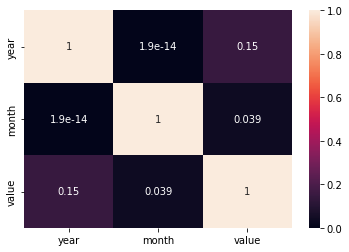

In [42]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,
           annot=True)

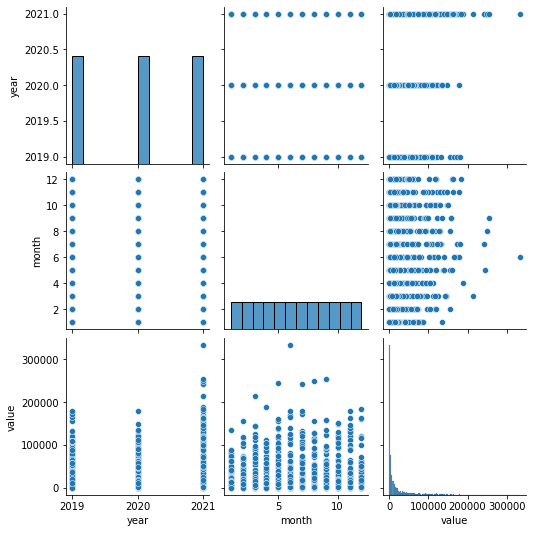

In [26]:
sns.pairplot(data)